In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas_datareader.data import DataReader

In [5]:
from datetime import datetime

In [6]:
from __future__ import division

In [7]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [10]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [12]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
#globals()[stock] is same as
#stock = 

In [13]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-15,99.247498,96.489998,98.989998,97.724998,153198000.0,97.070930
2020-07-16,97.404999,95.904999,96.562500,96.522499,110577600.0,95.876472
2020-07-17,97.147499,95.839996,96.987503,96.327499,92186800.0,95.682777
2020-07-20,98.500000,96.062500,96.417503,98.357498,90318000.0,97.699188
2020-07-21,99.250000,96.742500,99.172501,97.000000,103433200.0,96.350784


In [14]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,125.069279,121.994466,123.617609,123.580089,1.188044e+08,123.239266
std,10.610154,10.690571,10.674312,10.678790,5.310427e+07,10.812989
min,92.970001,89.144997,90.987503,92.614998,4.669130e+07,91.995125
25%,118.769997,115.610001,117.180000,116.589996,8.347720e+07,116.162689
50%,125.860001,122.860001,124.529999,124.760002,1.039164e+08,124.397202
75%,132.490005,129.470001,131.190002,131.240005,1.433019e+08,130.755875
max,150.000000,147.679993,149.240005,149.149994,3.743368e+08,149.149994


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-07-15 to 2021-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

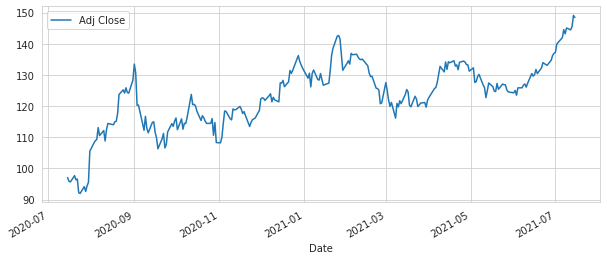

In [16]:
AAPL['Adj Close'].plot(legend = True, figsize = (10, 4))

<AxesSubplot:xlabel='Date'>

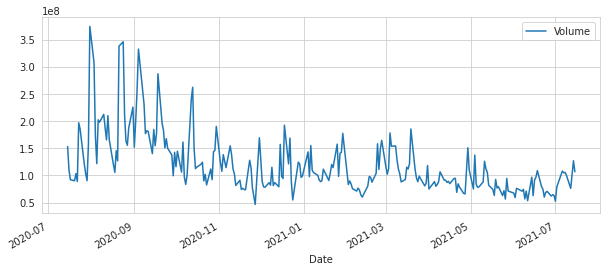

In [17]:
AAPL['Volume'].plot(legend = True, figsize = (10, 4))

In [29]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = "MA for " + str(ma) + " days"
#     AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

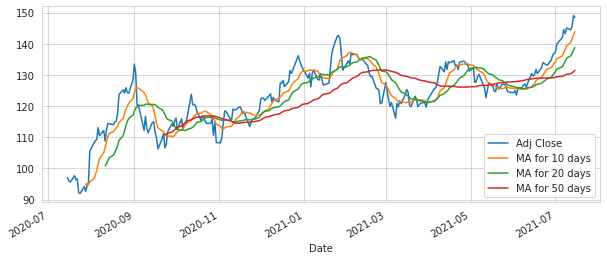

In [31]:
graph_mean = AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (10, 4))

<AxesSubplot:xlabel='Date'>

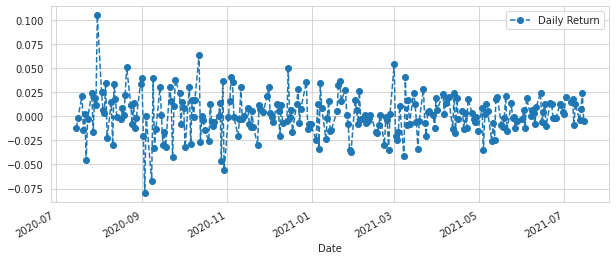

In [38]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (10, 4), legend = True, linestyle = '--', marker = 'o')

/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

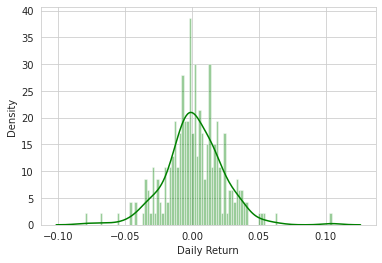

In [40]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'green')

<AxesSubplot:>

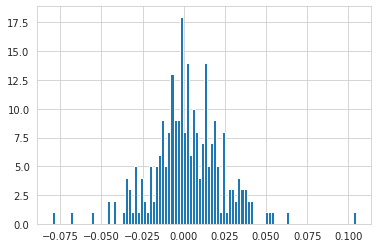

In [41]:
AAPL['Daily Return'].hist(bins = 100)